In [17]:
import pandas as pd

In [18]:
students_score_1 = pd.read_csv("students_score_1.csv", encoding='gbk')
students_score_2 = pd.read_csv("students_score_2.csv", encoding='gbk')

In [19]:
students_score_1.head()

,姓名,性别,学号,文学,政治,军事学,管理学,工程学,哲学,体育,高等数学,礼仪课
0,关羽,男,1031,96,98,93,80,75,76,78,81,96
1,刘备,男,1032,93,97,92,78,74,78,80,77,95
2,韩信,男,1033,89,96,97,79,76,77,84,80,93
3,张良,男,1034,85,75,93,80,76,75,74,82,75
4,刘秀,男,1035,95,97,92,82,84,79,81,92,85


In [20]:
students_score_2.head()

,姓名,性别,学号,大数据可视化,计算机组成原理,推荐系统,Python编程,人工智能,机器学习导论,金融投资课程,演讲与口才课程
0,关羽,男,1031,65,58.0,62,78,70,68,58.0,72
1,刘备,男,1032,70,65.0,75,80,75,78,70.0,75
2,韩信,男,1033,68,60.0,70,82,72,70,55.0,68
3,张良,男,1034,58,NaN,68,75,65,60,NaN,65
4,刘秀,男,1035,75,72.0,80,85,80,82,65.0,70


### 将两张宽表转换为长表；

In [21]:
score_long1 = pd.melt(students_score_1, id_vars=['学号', '姓名', '性别'], value_vars=students_score_1.columns[3:]).rename(columns={'variable': '科目', 'value': '成绩'})
score_long1.head()

,学号,姓名,性别,科目,成绩
0,1031,关羽,男,文学,96
1,1032,刘备,男,文学,93
2,1033,韩信,男,文学,89
3,1034,张良,男,文学,85
4,1035,刘秀,男,文学,95


In [22]:
score_long2 = pd.melt(students_score_2, id_vars=['学号', '姓名', '性别'], value_vars=students_score_2.columns[3:]).rename(columns={'variable': '科目', 'value': '成绩'})
score_long2.head()

,学号,姓名,性别,科目,成绩
0,1031,关羽,男,大数据可视化,65.0
1,1032,刘备,男,大数据可视化,70.0
2,1033,韩信,男,大数据可视化,68.0
3,1034,张良,男,大数据可视化,58.0
4,1035,刘秀,男,大数据可视化,75.0


### 将两张长表合并；

In [23]:
score_stack = pd.concat([score_long1, score_long2], axis=0, ignore_index=True)
score_stack.shape, score_long1.shape, score_long2.shape, score_stack.head()

((680, 5),
 (360, 5),
 (320, 5),
      学号  姓名 性别  科目    成绩
 0  1031  关羽  男  文学  96.0
 1  1032  刘备  男  文学  93.0
 2  1033  韩信  男  文学  89.0
 3  1034  张良  男  文学  85.0
 4  1035  刘秀  男  文学  95.0)

### 对各科目数据分别进行归一化，使各科目最高分为1，最低分为0，写出归一化公式；
#### x' = (x - min(x)) / (max(x) - min(X))

In [24]:
score_normalized = None
for course, group in score_stack.groupby('科目'):
    group['成绩'] = (group['成绩'] - group['成绩'].min()) / (group['成绩'].max() - group['成绩'].min())
    # 叠加成绩
    score_normalized = pd.concat([score_normalized, group], axis=0, ignore_index=True)

In [25]:
score_normalized.head(), score_normalized.min(), score_normalized.max()

(     学号  姓名 性别        科目        成绩
 0  1031  关羽  男  Python编程  0.565217
 1  1032  刘备  男  Python编程  0.652174
 2  1033  韩信  男  Python编程  0.739130
 3  1034  张良  男  Python编程  0.434783
 4  1035  刘秀  男  Python编程  0.869565,
 学号        1031
 姓名          关羽
 性别           女
 科目    Python编程
 成绩         0.0
 dtype: object,
 学号    2013
 姓名      鲁班
 性别       男
 科目    高等数学
 成绩     1.0
 dtype: object)

### 利用Pandas自身可视化API和计算分析API完成下列任务；

### 算出平均成绩最好的3名同学和他们的成绩，要求不能有缺考和挂科；

In [28]:
# 合并两张宽表
students_score_all = pd.merge(students_score_1, students_score_2, on=['学号', '姓名', '性别'])
students_score_all.head()

,姓名,性别,学号,文学,政治,军事学,管理学,工程学,哲学,体育,高等数学,礼仪课,大数据可视化,计算机组成原理,推荐系统,Python编程,人工智能,机器学习导论,金融投资课程,演讲与口才课程
0,关羽,男,1031,96,98,93,80,75,76,78,81,96,65,58.0,62,78,70,68,58.0,72
1,刘备,男,1032,93,97,92,78,74,78,80,77,95,70,65.0,75,80,75,78,70.0,75
2,韩信,男,1033,89,96,97,79,76,77,84,80,93,68,60.0,70,82,72,70,55.0,68
3,张良,男,1034,85,75,93,80,76,75,74,82,75,58,NaN,68,75,65,60,NaN,65
4,刘秀,男,1035,95,97,92,82,84,79,81,92,85,75,72.0,80,85,80,82,65.0,70


In [29]:
students_score_all['平均成绩'] = students_score_all.iloc[:, 3:].mean(axis=1)
sorted_stu_score_all = students_score_all.dropna().sort_values(by='平均成绩', ascending=False)
top_3_students = sorted_stu_score_all.head(3)
top_3_students

,姓名,性别,学号,文学,政治,军事学,管理学,工程学,哲学,体育,...,礼仪课,大数据可视化,计算机组成原理,推荐系统,Python编程,人工智能,机器学习导论,金融投资课程,演讲与口才课程,平均成绩
26,慈禧,女,1057,95,99,97,90,85,79,87,...,96,80,82.0,80,88,85,85,80.0,92,87.823529
8,赵匡胤,男,1039,97,99,97,88,90,79,85,...,88,80,78.0,82,88,85,85,75.0,80,86.411765
21,吕雉,女,1052,93,98,93,82,80,75,83,...,98,78,80.0,75,85,80,75,75.0,95,84.058824


### 画出各科目成绩分布的箱型图；

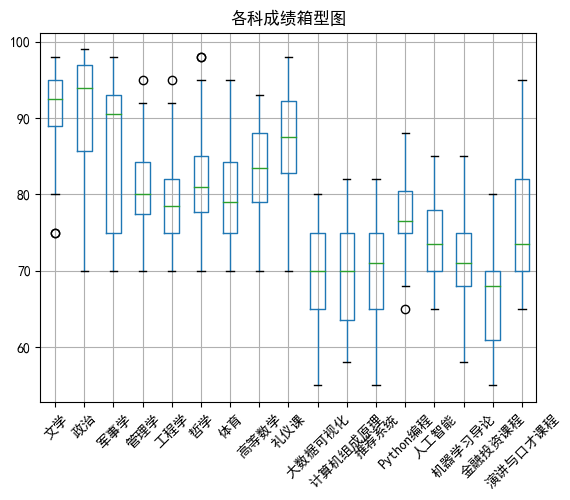

In [30]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置字体为SimHei显示中文
rcParams['font.sans-serif'] = 'SimHei'
# students_score_all.fillna(0)    # 填充缺失值
students_score_all[students_score_all.columns[3:-1]].boxplot()  # 绘制箱型图
plt.title('各科成绩箱型图')
plt.xticks(rotation=45)  # 设置x轴标签旋转角度
plt.show()

### 画出所有成绩分布的直方图；

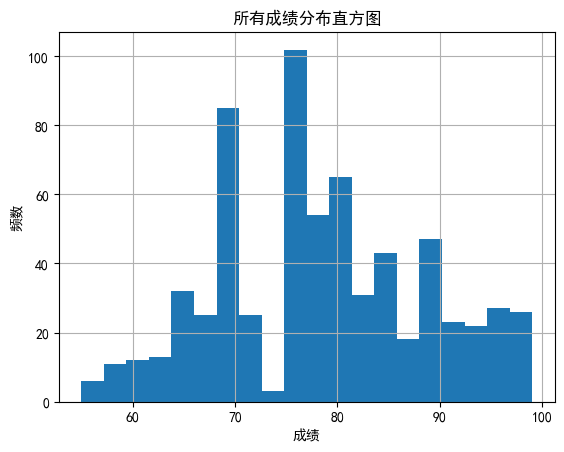

In [31]:
# 画出所有成绩分布的直方图
students_score_all_long = pd.melt(students_score_all, id_vars=['学号', '姓名', '性别'], value_vars=students_score_all.columns[3:-1]).rename(columns={'variable': '科目', 'value': '成绩'})
students_score_all_long['成绩'].hist(bins=20)
plt.title('所有成绩分布直方图')
plt.xlabel('成绩')
plt.ylabel('频数')
plt.show()

### 基于分析选出各课程的课代表人选；

In [42]:
# 求每一科成绩最高的学生
for course, group in students_score_all_long.groupby('科目'):
    print(course, group[group['成绩'] == group['成绩'].max()], end='\n\n')

Python编程        学号   姓名 性别        科目    成绩
488  1039  赵匡胤  男  Python编程  88.0
506  1057   慈禧  女  Python编程  88.0

人工智能        学号   姓名 性别    科目    成绩
528  1039  赵匡胤  男  人工智能  85.0
546  1057   慈禧  女  人工智能  85.0

体育        学号  姓名 性别  科目    成绩
269  2003  李白  男  体育  95.0

军事学        学号  姓名 性别   科目    成绩
112  2006  孙武  男  军事学  98.0

哲学        学号   姓名 性别  科目    成绩
233  2007  王阳明  男  哲学  98.0
236  2010   朱熹  男  哲学  98.0

大数据可视化        学号   姓名 性别      科目    成绩
368  1039  赵匡胤  男  大数据可视化  80.0
374  1045  李清照  女  大数据可视化  80.0
386  1057   慈禧  女  大数据可视化  80.0

工程学        学号  姓名 性别   科目    成绩
191  2005  鲁班  男  工程学  95.0

推荐系统        学号   姓名 性别    科目    成绩
448  1039  赵匡胤  男  推荐系统  82.0

政治       学号   姓名 性别  科目    成绩
48  1039  赵匡胤  男  政治  99.0
56  1047  朱元璋  男  政治  99.0
66  1057   慈禧  女  政治  99.0

文学       学号  姓名 性别  科目    成绩
27  2001  孔子  男  文学  98.0

机器学习导论        学号   姓名 性别      科目    成绩
568  1039  赵匡胤  男  机器学习导论  85.0
586  1057   慈禧  女  机器学习导论  85.0

演讲与口才课程        学号   姓名 性别       科目    成绩
661  1052

### 结合归一化之前的数据，用统计和可视化方法分析出最容易考的3门课，和最不容易考的3们课。

In [51]:
# 结合归一化之前的数据，用统计和可视化方法分析出最容易考的3门课，和最不容易考的3们课
students_score_all_long.groupby('科目')['成绩'].agg(['mean']).sort_values(by='mean', ascending=False).head(3)

,mean
科目,
文学,91.075
政治,90.200
军事学,86.400


In [53]:
students_score_all_long.groupby('科目')['成绩'].agg(['mean']).sort_values(by='mean', ascending=False).tail(3)


,mean
科目,
大数据可视化,69.175000
计算机组成原理,69.000000
金融投资课程,67.028571
